# 2950 Project Phase II

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from   sklearn.linear_model import LogisticRegression, LinearRegression

In [2]:
df = pd.read_csv('WHOcleaner.csv')

# Exponential Decay Regression: HIV/AIDs and Schooling

Coefficient:-0.0139.
Intercept: 2.4850.
r^2: 0.0528.


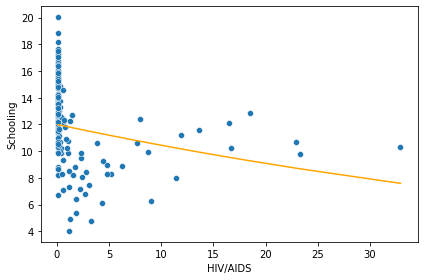

In [14]:
#transform output variable
x='hiv/aids'
y= 'schooling'
log_y = np.log(df[y])
pred= []
cleaned_pred= []

#relationship
model = LinearRegression().fit(df[[x]], log_y)
pred.append(np.exp(model.intercept_) * np.exp(model.coef_[0] * df[x]))
y_pred = np.exp(model.intercept_) * np.exp(model.coef_[0] * df[x])
cleaned_pred.append(y_pred)

#graph
plt.figure()
sns.scatterplot(data=df, y="schooling", x='hiv/aids')
indices = np.argsort(df[x].values)
plt.plot(df[x].values[indices], cleaned_pred[0][indices], c='orange')
plt.ylabel('Schooling')
plt.xlabel('HIV/AIDS')
plt.tight_layout()
print(f"Coefficient:{model.coef_[0]: 0.4f}.")
print(f"Intercept:{model.intercept_: 0.4f}.")
print(f"r^2:{model.score(df[[x]], log_y): 0.4f}.")

Coefficient:-0.3130.
Intercept: 2.6674.
r^2: 0.3418.


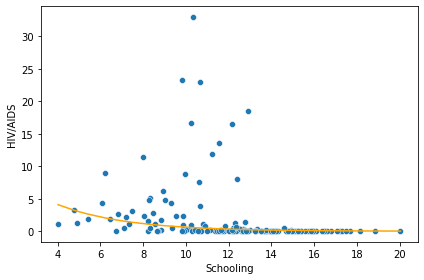

In [3]:
#transform output variable
y='hiv/aids'
x= 'schooling'
log_y = np.log(df[y])
pred= []
cleaned_pred= []

#relationship
model = LinearRegression().fit(df[[x]], log_y)
pred.append(np.exp(model.intercept_) * np.exp(model.coef_[0] * df[x]))
y_pred = np.exp(model.intercept_) * np.exp(model.coef_[0] * df[x])
cleaned_pred.append(y_pred)

#graph
plt.figure()
sns.scatterplot(data=df, x="schooling", y='hiv/aids')
indices = np.argsort(df[x].values)
plt.plot(df[x].values[indices], cleaned_pred[0][indices], c='orange')
plt.xlabel('Schooling')
plt.ylabel('HIV/AIDS')
plt.tight_layout()
print(f"Coefficient:{model.coef_[0]: 0.4f}.")
print(f"Intercept:{model.intercept_: 0.4f}.")
print(f"r^2:{model.score(df[[x]], log_y): 0.4f}.")

# Multiple Linear Regression

In [4]:
multireg= LinearRegression().fit(df[["percentage_expenditure", "income_composition_of_resources", "gdp"]], df["life_expectancy"])
multireg.score(df[["percentage_expenditure", "income_composition_of_resources", "gdp"]], df["life_expectancy"])

0.6779216915496652

Observed slope:  0.000413220914646718
Bootstrapped CI: [-0.00086464  0.00132741]


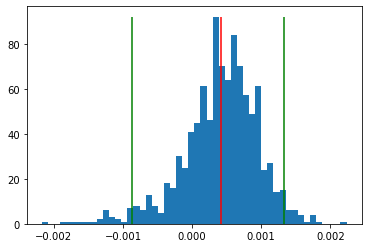

In [12]:
real_slope = multireg.coef_[0]
n_bootstrap = 1000
bootstrap_slopes = np.zeros(n_bootstrap)

for i in range(n_bootstrap):
    resampled_data = df.sample(n=len(df), replace=True)
    resampled_model = LinearRegression().fit(resampled_data[["percentage_expenditure", "income_composition_of_resources", "gdp"]], resampled_data["life_expectancy"])
    
    bootstrap_slopes[i] = resampled_model.coef_[0]
    
print(f'Observed slope:  {real_slope}')
print(f'Bootstrapped CI: {np.quantile(bootstrap_slopes, q=[0.025, 0.975])}')

binsizes, _, _ = plt.hist(bootstrap_slopes, bins=50)
plt.vlines(real_slope, ymin=0, ymax=np.max(binsizes), color='red')
plt.vlines(np.quantile(bootstrap_slopes, q=[0.025])[0], ymin=0, ymax=np.max(binsizes), color='green')
plt.vlines(np.quantile(bootstrap_slopes, q=[0.975])[0], ymin=0, ymax=np.max(binsizes), color='green')
plt.show()